# **Cryptocurrency Price Forecast Using Prophet Time Series Forecasting Algorithm**

>[Cryptocurrency Price Forecast Using Prophet Time Series Forecasting Algorithm](#scrollTo=uI_bYNuzqvdg)

>[Introduction](#scrollTo=MnJiGK2IkLgJ)

>[Data Source](#scrollTo=82scdeNrVQ6v)

>[Methodology](#scrollTo=Jrz4tw8_Pdh-)

>[Download and Import all Dependencies](#scrollTo=dGJjiFv_q5wm)

>[Importing and Exploring the Dataset](#scrollTo=CD-h6LytrH6t)

>[Visualizing the Data Set](#scrollTo=EPmyNqS7eQHj)

>>[BTC Price and Volume](#scrollTo=2YUE4gb7ecrX)

>[Data Preparation](#scrollTo=suVX3d0f1eV4)

>>[Preparing Data for the Algorithm](#scrollTo=umpPEhAr4yfr)

>>[Train Test Split](#scrollTo=X1SrZ00W369d)

>[Forecasting with Prophet](#scrollTo=5zoUEbpcfD0b)

>>[Model Training](#scrollTo=QxBq4u_mfIdm)

>>[Model Forecasting](#scrollTo=CI6cGEmMgqKB)

>>[Forcast Visualization](#scrollTo=ovMKyaL7ipWl)

>>[Forecast Components Visualization](#scrollTo=9tmy_gLu1B0C)

>>[Cross Validation](#scrollTo=WKmdsMSmoHAe)

>>>[Performance Matrix](#scrollTo=dfNGKa24hw2y)

>>>[Performance Metric Visualization](#scrollTo=GQzTU9xXh42U)

>>>[Mean Absolute Percentage Error By Sklearn](#scrollTo=ajJ_85iNsm4F)

>>[Fine Tuning Hyperparameters](#scrollTo=mz1Zd7ugApSw)

>>[Re-trainig the Model](#scrollTo=2J5BFltZsm-l)

>>>[Cross Validation](#scrollTo=7uGkqtTf2aQn)

>>>[Performance Matrix](#scrollTo=JvN7wPhh5ujr)

>>>[Performance Metric Visualization](#scrollTo=S6C1cfS1555B)

>>>[Mean Absolute Percentage Error By Sklearn](#scrollTo=taPxlAq5rVo2)

>[Results](#scrollTo=aPO-3S2aJFvh)

>>[Before and After Hyperparameter Tuning Performance Metric Comparison](#scrollTo=WNX_Pv7ruHW8)

>[Conclusion](#scrollTo=mJ-0rVyfu31E)



# Introduction

In this notebook I'll use [Prophet](https://facebook.github.io/prophet/) time series forecasting algorithm to attempt to forecast Bitcoin's price for the next thrirty days. 

[**Prophet**](https://facebook.github.io/prophet/)  is an open source forecasting package that was developed by Facebook’s data science research team. The procedure for forecasting time series data is based on an univariate additive model where non-linear trends are fit with `yearly, weekly, and daily seasonality, plus holiday effects`. It works best with time series that have `strong seasonal effects` and `several seasons` of historical data. Prophet is `robust` to missing data and shifts in the trend, and typically handles outliers well.

<br>

[**Bitcoin** **(BTC)**](https://www.coingecko.com/en/coins/bitcoin) is a scarse decentralized digital currency intoduced into the world in 2009 by a person or group of people using the pseudonym `Satoshi Nakamoto`. It can be transferred on the peer-to-peer bitcoin network. Bitcoin transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain.


<br>
As of August 31st 2022 

*   Circulating supply of BTC: 18,925,000
*   Market Capitalization: $412 Billion USD
*   Market Cap Rank: #1 *(among all cryptocurrencies)*

*   Trading Volume: $27,851,916,129 USD

*   Current Price: $20,000 USD per unit 

# Data Source

For this project I'll be using data from `May 11th, 2020 to September 16th, 2022`. The profile of this asset has change dramatically in recent years, that is why I'm choosing to use relatively newer data; and is around this time when a pivot point is marked in the life trajectory of this asset. 

<br>
The period used is characterized by the increased presence of institutional interest, which many cite as a contributing factor to the latest bull run that began in late 2020 and ended in late 2021. As for the exact date, "May 11th, 2020", it marks the start of the third cycle of a very critical event engraved in the monetary policy of the cryptocurrency, called the Bitcoin Halving. This cyclical event happens after every 210,000 blocks have been mined on the blockchain, a process that takes roughly four years to complete.
<br>
<br>
At a bitcoin halving event, the rate at which new Bitcoin units are released into circulation is reduced by 50%. It's important to note that 21 million units is the max cap for this asset, and 90% of the supply is already in circulation. That is what makes this event so important, as it creates disinflationary pressure on the digital currency driving Bitcoin's medium-term and long-term price development.  
<br>


<br>
Initially, I wanted to use data from the day it was first listed on an exchange back in 2010. Also, I wanted to add a custom seasonality component to Prophet by using the Bitcoin halving dates to mark the start and end of a season. However, after comparing cross-validation results among models using different date ranges, I found out I get more accurate results by using data from the last Bitcoin halving and onwards. And, since I need at least two season cycles (8 years of data) to be able to add a custom seasonality component to Prophet, I could not add the custom component into the algorithm. Prophet will however detect automatically any perceived yearly, monthly, or weekly seasonality and forecast accordingly.  

To import data from cryptocurrency exchanges I used the `CCXT library`. The CCXT library is normally used to connect and trade with cryptocurrency exchanges and payment processing services worldwide. It provides quick access to market data for storage, analysis, visualization, indicator development, algorithmic trading, strategy back-testing, bot programming, and related software engineering.

# Methodology

In principle, you don't need to specify any hyperparameters. Prophet can, automatically, detect and set a good set of hyperparameters for you. However, my experience with this particular dataset led me to manually set some hyperparameters when training the model. These include: 

*   `seasonality_mode`: Options are "additive", "multiplicative". Default is 'additive', but many business time series will have multiplicative seasonality. This is best identified just from looking at the time series and seeing if the magnitude of seasonal fluctuations grows with the magnitude of the time series. In our case, it is multiplicative.
*   `changepoint_range`: This is the proportion of the history in which the trend is allowed to change. This defaults to 0.8, 80% of the history, meaning the model will not fit any trend changes in the last 20% of the time series. This is fairly conservative, to avoid overfitting to trend changes at the very end of the time series where there isn’t enough runway left to fit it well.
*   `n_changepoints`: This is the number of automatically placed changepoints. The default of 25 should be plenty to capture the trend changes in a typical time series.

<br>
I found that manipulating these parameters would produce more accurate results, measured by cross validation techniques, than just running the Prophet algorithm with default values.

Nevertheless, there were 2 very important hyperparameters that I left out from the initial model training, `changepoint_prior_scale` and `seasonality_prior_scale`.

Prophet suggests these are the most impactful when tuned right. So, I later retrained the model with the output of a hyperparameter tuning script that optimized the model for `changepoint_prior_scale` and `seasonality_prior_scale` with the purpose of comparing this second version of the model with the first version of the model.  |

The hyperparameter tuning script performed a grid search on a 4x4 grid for every possible combination, and output the best set of values that would minimize the error and increased accuracy.   

*   `changepoint_prior_scale`: This is probably the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints. If it is too small, the trend will be underfit and variance that should have been modeled with trend changes will instead end up being handled with the noise term. If it is too large, the trend will overfit and in the most extreme case you can end up with the trend capturing yearly seasonality. The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] would likely be about right. Parameters like this (regularization penalties; this is effectively a lasso penalty) are often tuned on a log scale.
*   `seasonality_prior_scale`: This parameter controls the flexibility of the seasonality. Similarly, a large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10., which applies basically no regularization. That is because we very rarely see overfitting here (there’s inherent regularization with the fact that it is being modeled with a truncated Fourier series, so it’s essentially low-pass filtered). A reasonable range for tuning it would probably be [0.01, 10]; when set to 0.01 you should find that the magnitude of seasonality is forced to be very small. This likely also makes sense on a log scale, since it is effectively an L2 penalty like in ridge regression.







# Download and Import all Dependencies

In [1]:
!pip install jedi==0.10.2
!pip install pystan
!pip install prophet
!pip install ccxt
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.io as pio
pio.renderers.default = 'colab'
import datetime
import plotly.express as px 
import plotly.graph_objects as go
from datetime import datetime
from plotly.subplots import make_subplots
import numpy as np
from google.colab import files 
from google.colab import drive
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import pickle


# Importing and Exploring the Dataset

Connecting to Binance Exchange and importing data using [**CCXT library**](https://github.com/ccxt/ccxt) 

In [3]:
# Connect to cryptocurrency Binance exchange 
binance = ccxt.binance()

# Fetching Ticker
btc_ticker = binance.fetch_tickers(['BTC/USDT'])

In [32]:
# Fetching Open, High, Low, Volume (OHLCV)
binance_BTCUSDT_ohlcv = binance.fetch_ohlcv('BTC/USDT', timeframe= '1d', limit=864)

# Creating dataframe with fetched data
BTC_Data = pd.DataFrame(binance_BTCUSDT_ohlcv,columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Changing the original data format from UTC timestamp in milliseconds to datetime
BTC_Data.Date = pd.to_datetime(BTC_Data.Date, unit='ms')

In [36]:
# Saving the retrieved data to google dirve as csv
from google.colab import files 
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/My Drive/Colab Notebooks/Forecasting Crypto Project/BTC_Data_ccxt.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  BTC_Data.to_csv(f)

print('Dataframe saved')

Mounted at /content/drive
Dataframe saved


The data was saved on a previous session. Here, I'm just uploading it from storage.

In [4]:
# Uploading older BTC data not available with CCTX api 
from google.colab import files 
files.upload()

Saving BTC_Data_ccxt.csv to BTC_Data_ccxt.csv


{'BTC_Data_ccxt.csv': b'\xef\xbb\xbf,Date,Open,High,Low,Close,Volume\n0,2020-05-11,8722.77,9168.0,8200.0,8561.52,168807.251832\n1,2020-05-12,8562.04,8978.26,8528.78,8810.79,86522.780066\n2,2020-05-13,8810.99,9398.0,8792.99,9309.37,92466.274018\n3,2020-05-14,9309.35,9939.0,9256.76,9791.98,129565.37747\n4,2020-05-15,9791.97,9845.62,9150.0,9316.42,115890.761516\n5,2020-05-16,9315.96,9588.0,9220.0,9381.27,59587.627862\n6,2020-05-17,9380.81,9888.0,9322.1,9680.04,68647.764323\n7,2020-05-18,9681.11,9950.0,9464.23,9733.93,82006.603583\n8,2020-05-19,9733.93,9897.21,9474.0,9775.53,78539.760454\n9,2020-05-20,9775.13,9842.0,9326.0,9511.43,74923.73809\n10,2020-05-21,9511.43,9578.47,8815.0,9068.65,108928.780969\n11,2020-05-22,9067.51,9271.0,8933.52,9170.0,58943.131024\n12,2020-05-23,9170.0,9307.85,9070.0,9179.15,43526.296966\n13,2020-05-24,9179.01,9298.0,8700.0,8720.34,70379.86645\n14,2020-05-25,8718.14,8979.66,8642.72,8900.35,62833.910949\n15,2020-05-26,8900.35,9017.67,8700.0,8841.18,58299.770138\n

In [134]:
#read_csv function from pandas
BTC_Data= pd.read_csv("BTC_Data_ccxt.csv")

# When saved data was saved in the previous session, it created a column witht the index row number. I dont need that. So here im deleting that column
BTC_Data.drop(columns=BTC_Data.columns[0], axis=1, inplace=True)

In [135]:
BTC_Data.head(5)

,Date,Open,High,Low,Close,Volume
0,2020-05-11,8722.77,9168.00,8200.00,8561.52,168807.251832
1,2020-05-12,8562.04,8978.26,8528.78,8810.79,86522.780066
2,2020-05-13,8810.99,9398.00,8792.99,9309.37,92466.274018
3,2020-05-14,9309.35,9939.00,9256.76,9791.98,129565.377470
4,2020-05-15,9791.97,9845.62,9150.00,9316.42,115890.761516


In [136]:
BTC_Data.tail(5)

,Date,Open,High,Low,Close,Volume
854,2022-09-12,21826.87,22488.00,21538.51,22395.74,395395.61828
855,2022-09-13,22395.44,22799.00,19860.00,20173.57,431915.03333
856,2022-09-14,20173.62,20541.48,19617.62,20226.71,340826.40151
857,2022-09-15,20227.17,20330.24,19497.00,19701.88,333069.76076
858,2022-09-16,19701.88,19890.00,19320.01,19803.30,283791.07064


We can see below that we got no missing data, and our data on the 'Date' column needs to be transformed to datetime data format. 

In [137]:
BTC_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    859 non-null    object 
 1   Open    859 non-null    float64
 2   High    859 non-null    float64
 3   Low     859 non-null    float64
 4   Close   859 non-null    float64
 5   Volume  859 non-null    float64
dtypes: float64(5), object(1)
memory usage: 40.4+ KB


In [138]:
BTC_Data.describe()

,Open,High,Low,Close,Volume
count,859.000000,859.000000,859.000000,859.000000,859.000000
mean,33355.101432,34288.269162,32290.971630,33368.136566,77430.123051
std,16522.475772,16976.698519,15980.876216,16507.691654,57041.568439
min,8562.040000,8978.260000,8200.000000,8561.520000,15805.447180
25%,19170.945000,19465.725000,18538.040000,19189.540000,43766.865128
50%,35516.070000,36835.220000,33777.770000,35513.200000,59749.157990
75%,46630.870000,47893.000000,45347.475000,46630.870000,87127.485881
max,67525.820000,69000.000000,66222.400000,67525.830000,431915.033330


#Visualizing the Data Set

## BTC Price and Volume

In [236]:
chart = go.Figure()

chart.add_trace(go.Scatter(
    x= BTC_Data['Date'], 
    y=BTC_Data['Close'], 
    name = "Price",
    yaxis="y2",
    #marker = {'color' : '#1f77b4'},
    showlegend = False
    )
)

chart.add_trace(go.Bar(
    x= BTC_Data['Date'], 
    y=BTC_Data['Volume'], 
    name = "Volume",
    yaxis="y",
    marker = {'color' : '#19D3F3', 'line_width':0.15}, #19D3F3 00CC99
    showlegend = False,

    )
)


chart.update_layout(
    xaxis=dict(
        autorange=True,
        range=["2020-05-11", "2022-09-16"],
        rangeslider=dict(
            autorange=True,
            range=["2020-05-11", "2022-09-16"],
        ),
        type="date",
        title_text= "Date",
        showgrid=True
    ),
    yaxis=dict(
        anchor="x",
        autorange=True,
        domain=[0, 0.3],
        #linecolor="#607d8b",
        mirror=True,
        range=[2500, 435000],
        showline=True,
        side="left",
        #tickfont={"color": "#607d8b"},
        tickmode="auto",
        ticks="",
        title="Volume",
        #titlefont={"color": "#607d8b"},
        type="linear",
        zeroline=False,        
    ),
    yaxis2=dict(
        anchor="x",
        autorange=True,
        domain=[0.3, 1],
        #linecolor="#6600FF",
        mirror=True,
        range=[8000, 70000],
        showline=True,
        side="left",
        tickfont={"color": "#6600FF"},
        tickmode="auto",
        ticks="",
        title="Price",
        titlefont={"color": "#6600FF"},
        type="linear",
        zeroline=False,
        fixedrange=False      
    )
)


# Add range buttons
chart.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)


# Update layout
chart.update_layout(
    title_text="BITCOIN DAILY PRICE & VOLUME",
    title_font_size=30,
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    #template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
)

# Data Preparation

## Preparing Data for the Algorithm

Prophet in its most simple form requires only two columns, `'datesatamp' and 'price'`

In [140]:
# Preparing data for the algorithm
# Inputs for Facebook Prophet in default mode 
# Isolating Date and Daily Closing Price
BTC_2020_2022_Date_Price = BTC_Data[['Date', 'Close']]
# Renaming of the columns is needed for the FP algorithm 
BTC_2020_2022_Date_Price = BTC_2020_2022_Date_Price.rename({'Date':'ds', 'Close':'y'}, axis=1)
# Converting the data type from string to datetime for the "ds" column
BTC_2020_2022_Date_Price["ds"] = pd.to_datetime(BTC_2020_2022_Date_Price["ds"])
# Sorting dataframe by date
BTC_2020_2022_Date_Price.sort_values(by = 'ds', inplace = True)

In [141]:
BTC_2020_2022_Date_Price.head(5)

,ds,y
0,2020-05-11,8561.52
1,2020-05-12,8810.79
2,2020-05-13,9309.37
3,2020-05-14,9791.98
4,2020-05-15,9316.42


In [142]:
BTC_2020_2022_Date_Price.tail(5)

,ds,y
854,2022-09-12,22395.74
855,2022-09-13,20173.57
856,2022-09-14,20226.71
857,2022-09-15,19701.88
858,2022-09-16,19803.30


## Train Test Split

In [143]:
# Train test split
df_train = BTC_2020_2022_Date_Price[BTC_2020_2022_Date_Price['ds']<='2022-08-16']
df_test = BTC_2020_2022_Date_Price[BTC_2020_2022_Date_Price['ds']>'2022-08-16']

# Print the number of records and date range for training and testing dataset.
print('The training dataset has', len(df_train), 'records, ranging from', df_train['ds'].min(), 'to', df_train['ds'].max())
print('The testing dataset has', len(df_test), 'records, ranging from', df_test['ds'].min(), 'to', df_test['ds'].max())

The training dataset has 828 records, ranging from 2020-05-11 00:00:00 to 2022-08-16 00:00:00
The testing dataset has 31 records, ranging from 2022-08-17 00:00:00 to 2022-09-16 00:00:00


In [144]:
df_test.head(2)

,ds,y
828,2022-08-17,23342.66
829,2022-08-18,23191.20


In [145]:
df_test.tail(2)

,ds,y
857,2022-09-15,19701.88
858,2022-09-16,19803.30


# Forecasting with Prophet

## Model Training

To train a model in Prophet, first we create an instance of the model class and then we call the fit method.

In principle, you don’t need to specify any hyparameters. One important exception is `seasonality_mode`. It is important to set this parameter to `multiplicative` if your model is multiplicative since Prophet is based on an `additive model`.


*   `seasonality_mode`: Options are "additive", "multiplicative". Default is 'additive', but many business time series will have multiplicative seasonality. This is best identified just from looking at the time series and seeing if the magnitude of seasonal fluctuations grows with the magnitude of the time series. In our case, it is multiplicative.
*   `changepoint_range`: This is the proportion of the history in which the trend is allowed to change. This defaults to 0.8, 80% of the history, meaning the model will not fit any trend changes in the last 20% of the time series. This is fairly conservative, to avoid overfitting to trend changes at the very end of the time series where there isn’t enough runway left to fit it well.
*   `n_changepoints`: This is the number of automatically placed changepoints. The default of 25 should be plenty to capture the trend changes in a typical time series
*   `interval_width`: Prophet predict returns uncertainty intervals for each component, like yhat_lower and yhat_upper for the forecast yhat. These are computed as quantiles of the posterior predictive distribution, and interval_width specifies which quantiles to use. The default of 0.8 provides an 80% prediction interval. You could change that to 0.95 if you wanted a 95% interval. This will affect only the uncertainty interval, and will not change the forecast yhat.

In [146]:
Prophet_Model = Prophet(seasonality_mode='multiplicative', 
                        changepoint_range=0.75, 
                        n_changepoints=30, 
                        yearly_seasonality= 4, 
                        interval_width=0.95
                        )

Prophet_Model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/xckx0qkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/t924g1rz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98890', 'data', 'file=/tmp/tmp535221if/xckx0qkw.json', 'init=/tmp/tmp535221if/t924g1rz.json', 'output', 'file=/tmp/tmpy_bq_fmh/prophet_model-20220922064458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Model Forecasting

Here we use the trained prophet Model to make the prediction for the next 30 days. 

In [147]:
future = Prophet_Model.make_future_dataframe(periods= 30)
forecast_model= Prophet_Model.predict(future)

Forecast output for the next 30 days, including upper-bounds and lower-bounds for each day.

In [148]:
forecast_model[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2020-05-11,12217.384969,6329.433169,18417.804142
1,2020-05-12,12078.941356,6555.138886,17889.974630
2,2020-05-13,11987.033080,6032.316212,17866.764100
3,2020-05-14,11800.044067,6180.347172,17426.708525
4,2020-05-15,11674.432960,5801.807310,17685.978138


In [149]:
# Check the forecasted values and upper/lower bounds
forecast_model[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


,ds,yhat,yhat_lower,yhat_upper
828,2022-08-17,25104.565866,19566.378173,31039.981448
829,2022-08-18,24999.895650,18925.155006,30560.680195
830,2022-08-19,25032.274419,19333.025022,30955.942069
831,2022-08-20,25061.571468,19317.795009,30539.093411
832,2022-08-21,25092.482916,19313.162146,31057.709946
833,2022-08-22,25101.863640,19432.182696,30761.190871
834,2022-08-23,25078.807999,19426.365565,31340.688232
835,2022-08-24,25160.335954,19654.491835,30800.243989
836,2022-08-25,25033.339581,19213.352338,30819.546911
837,2022-08-26,25043.423698,19025.975126,30875.771895


## Forcast Visualization

*   The `x-axis` is the date in the forecast visualization
*   the `y axis` is the Bitcoin close price
*   The `black dots` are the actual prices in the training dataset
*   the `red dots` are the actual forecast prices
*   The `blue line` is the time series model prediction
*   The `shaded area` is the 95% prediction interval

In [238]:
from plotly.graph_objects import Layout
import plotly.graph_objects as go

# Set layout with background color you want (rgba values)
# This one is for white background
layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

figure = go.Figure(layout = layout)



# Lower Band
figure.add_trace(go.Scatter(x=forecast_model['ds'],
                            y=forecast_model['yhat_lower'],
                            hoverinfo = 'none',
                            showlegend = False,                    
                            marker = {'color': "rgba(0, 0, 0,0)"}))

# Upper Band
figure.add_trace(go.Scatter(name = 'Confidence Interval',
                            x=forecast_model['ds'], 
                            y=forecast_model['yhat_upper'],                                                        
                            fill = "tonexty",  
                            fillcolor = "rgba(231, 234, 241,.75)",
                            hoverinfo = 'none',
                            mode="none"
                            ))

# yhat
figure.add_trace(go.Scatter(name = 'Model Line of Best Fit',
                            x=forecast_model['ds'], 
                            y=forecast_model['yhat'],
                            mode="lines",
                            line = {'width' : 4},
                            marker = {'color' : '#19D3F3'}))

# Actual Price
figure.add_trace(go.Scatter(x=df_train['ds'],
                            y=df_train['y'], 
                            name = 'Train Data', 
                            mode="markers", 
                            fill = None,  
                            marker = {
                                'color': "#fffaef", 
                                'size':5,
                                'line': {
                                    'color':'#000000', 
                                    'width': .75}}))

figure.add_trace(go.Scatter(x=df_test['ds'],
                            y=df_test['y'], 
                            name = 'Test Data', 
                            mode="markers", 
                            fill = None,  
                            marker = {
                                'color': "#FAB8C6", 
                                'size':5,
                                'line': {
                                    'color':'#000000', 
                                    'width': .75}}))

figure.update_xaxes(title_text="Date", showgrid=True, gridwidth=1, gridcolor='lightgray')  
figure.update_yaxes(title_text="Price", showgrid=True, gridwidth=1, gridcolor='lightgray')  

# update layout by changing the plot size, hiding legends & rangeslider
figure.update_layout(height=600, 
                     legend= {'borderwidth' : 2,'bordercolor' : "lightgrey"}, 
                     title_text= "BTC Forecast Model", 
                     title_font_size=30,
                     #title_x=0.5
                     )

# Title
#figure.update_layout(title_text="BITCOIN LINEAR CHART",
#                  title_font_size=30)


#, xaxis_rangeslider_visible=True

##Forecast Components Visualization

`Trend`: We see a sharp increase at the end of 2020. It reaches the top around April 2021. It then gradually decreases till the November 2021. To continue falling at an accelarated pace

`Weekly Seasonality`: It shows Bitcoin's price starts decreasing Monday to reach the lowest point fo the week on Thursday. Then the prices starts to climb to its highest point on Saturday.

`Yearly Seasonality`: The year starts with a gradual uptrend till April, where it reverses sharply, reaching its lowest point in July. Here, it does a relatively sharp reversal once again to a positive slope, to reah its highest point on November. 


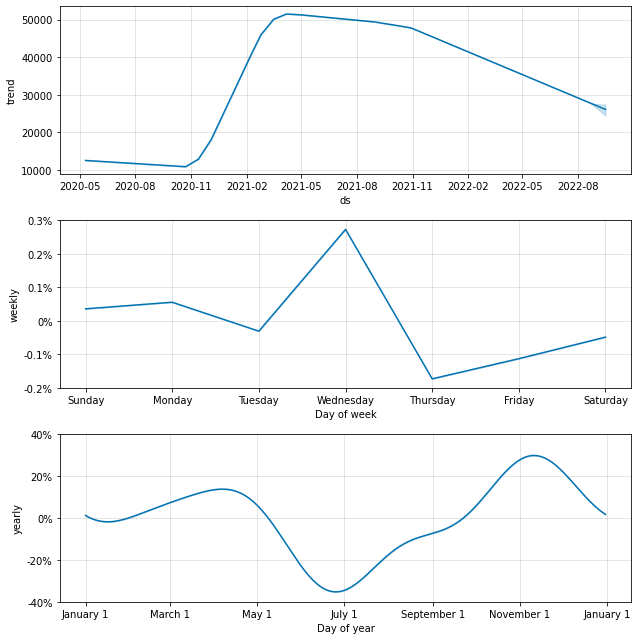

In [151]:
fig2 = Prophet_Model.plot_components(forecast_model)


## Cross Validation

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

<br>

We invoke the `cross_validation` function, and we specify the following:

<br>

`Prophet_Model` is the trained model.

`initial = 605 days` means the initial model will be trained on the first 605 days of data.

`period = 15 days` means 15 days will be added to the training dataset for each additional model.

`horizon = 30 days` means that the model forecasts the next 30 days. When only horizon is given, Prophet defaults initial to be triple the horizon, and period to be half of the horizon.

`parallel = processes` enables parallel processing for cross-validation. When the parallel cross-validation can be done on a single machine, "processes" provide the highest performance. For larger problems, "dask" can be used to do cross-validation on multiple machines.

In [152]:
from prophet.diagnostics import cross_validation, performance_metrics

In [153]:
forecast_cv = cross_validation(Prophet_Model, initial='605 days', period='15 days', horizon = '30 days' , parallel="processes")

INFO:prophet:Making 13 forecasts with cutoffs between 2022-01-18 00:00:00 and 2022-07-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f816af53490>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/7xpwpf9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/hwij8nqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/qc4hd7fo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31497', 'data', 'file=/tmp/tmp535221if/7xpwpf9t.json', 'init=/tmp/tmp535221if/qc4hd7fo.json', 'output', 'file=/tmp/tmpdtkhbaea/prophet_model-20220922064519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/2g5oczsa.json
06:45:19 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 0
INFO:cmdstanpy:Chain [1] start processing
DEB

### Performance Matrix

`pm` is the performance matrix datframe showing several model fit statistics:

<br>

*   MS: mean squared error
*   RMSE: root mean squared error
*   MAE: mean absolute error
*   MAPE: mean absolute percent error
*   MDAPE: median absolute percent error

In [196]:
# Model performance metrics
pm = performance_metrics(forecast_cv, rolling_window=0.05)

display(pm.head(),pm.tail())

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,9.435795e+06,3071.773920,2455.509931,0.073505,0.085383,0.074317,0.947368
1,3 days,1.296140e+07,3600.194496,2585.776508,0.077225,0.050717,0.077143,0.923077
2,4 days,1.923093e+07,4385.308132,3153.427378,0.093559,0.081808,0.093163,0.817814
3,5 days,2.210828e+07,4701.943821,3475.794094,0.100651,0.067622,0.101507,0.769231
4,6 days,2.275396e+07,4770.110680,3713.386307,0.106847,0.074549,0.107954,0.769231


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
24,26 days,3.957145e+07,6290.584536,4874.951540,0.139398,0.128417,0.146398,0.692308
25,27 days,4.153350e+07,6444.649259,5114.538277,0.143462,0.115898,0.152046,0.639676
26,28 days,4.371522e+07,6611.748599,5282.412995,0.148187,0.143642,0.158665,0.615385
27,29 days,4.283665e+07,6544.971176,5281.668692,0.149616,0.165710,0.159262,0.668016
28,30 days,4.758932e+07,6898.501366,5510.556676,0.158125,0.165886,0.166746,0.639676


In [155]:
pm.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,29,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,16 days 00:00:00,2.980652e+07,5395.412128,4155.470500,0.120642,0.100687,0.124971,0.741589
std,8 days 12:21:09.491008020,8.784805e+06,849.063214,738.142853,0.020589,0.030838,0.023171,0.078319
min,2 days 00:00:00,9.435795e+06,3071.773920,2455.509931,0.073505,0.050717,0.074317,0.615385
25%,9 days 00:00:00,2.555567e+07,5055.261172,3793.500695,0.110454,0.081808,0.112583,0.692308
50%,16 days 00:00:00,2.875633e+07,5362.493054,4020.183019,0.119932,0.096186,0.122425,0.716599
75%,23 days 00:00:00,3.455701e+07,5878.521477,4544.412410,0.135742,0.116478,0.143044,0.769231
max,30 days 00:00:00,4.758932e+07,6898.501366,5510.556676,0.158125,0.165886,0.166746,0.947368


The below dataframe show us the performance metrics for each of the folds. There were 13 cut-offs. Therefore, on the performace metric visualization below you will see 13 dots per horizon day.

In [197]:
# Model performance metrics
pm_all = performance_metrics(forecast_cv, rolling_window=-1)

display(pm_all.head(),pm_all.tail())

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,2.151463e+07,4638.387110,4638.387110,0.111339,0.111339,0.105468,True
330,1 days,6.493609e+06,2548.256026,2548.256026,0.131926,0.131926,0.123762,True
60,1 days,4.570748e+05,676.073061,676.073061,0.016913,0.016913,0.016771,True
300,1 days,1.382149e+07,3717.726481,3717.726481,0.195971,0.195971,0.178482,True
90,1 days,1.030140e+06,1014.958275,1014.958275,0.025762,0.025762,0.026098,True


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
59,30 days,1.721505e+07,4149.102067,4149.102067,0.105983,0.105983,0.111914,True
329,30 days,1.708895e+07,4133.878721,4133.878721,0.198762,0.198762,0.180794,True
29,30 days,8.991988e+07,9482.609094,9482.609094,0.234048,0.234048,0.209528,False
119,30 days,2.565739e+08,16017.922802,16017.922802,0.345159,0.345159,0.417151,False
389,30 days,1.228977e+07,3505.676707,3505.676707,0.146959,0.146959,0.136900,True


In [198]:
pm_all.dtypes

horizon     timedelta64[ns]
mse                 float64
rmse                float64
mae                 float64
mape                float64
mdape               float64
smape               float64
coverage               bool
dtype: object

As we see above, the data in the horizon column is of timedelta data type. We need to convert the data format to string or integers so we can plot them

In [199]:
pm_all['horizon'] = pm_all['horizon'].astype('timedelta64[D]')


In [121]:
pm_all.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1.0,2.151463e+07,4638.387110,4638.387110,0.111339,0.111339,0.105468,True
330,1.0,6.493609e+06,2548.256026,2548.256026,0.131926,0.131926,0.123762,True
60,1.0,4.570748e+05,676.073061,676.073061,0.016913,0.016913,0.016771,True
300,1.0,1.382149e+07,3717.726481,3717.726481,0.195971,0.195971,0.178482,True
90,1.0,1.030140e+06,1014.958275,1014.958275,0.025762,0.025762,0.026098,True


### Performance Metric Visualization 

The MAPE values for this prediction ranges between **`7.35%`** and **`15.81%`.**

On the graph below, the blue line shows the mean absolute percentage error (MAPE), where the mean is taken over a 5% rolling window of the grey dots. 

The `x-axis` is the horizon. The horizon was set to be 30 days into the future.
The `y-axis` is the metric we are interested in. We use **MAPE** in this visualization.
On each day, we can see 13 dots. This is because there are `13 models` (with cutoffs between 2022-01-18 and 2022-07-17) in the cross-validation, and each dot represents the MAPE for each model.
The line is the aggregated performance across all the models. 

We can see that MAPE value increases with days, which is expected because time series tend to make better predictions for the near future than the far future.



In [158]:
from prophet.plot import plot_cross_validation_metric

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



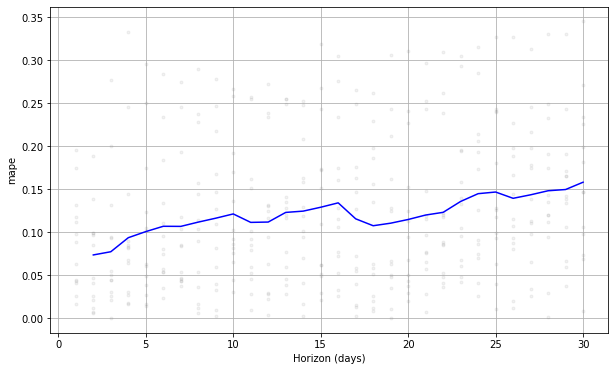

In [159]:
# Visualize the performance metrics
fc_cv_fig = plot_cross_validation_metric(forecast_cv, metric='mape', rolling_window=0.05)
plt.show()

### Mean Absolute Percentage Error By Sklearn

In [160]:
# Data for the MAPE calculation 

df_y_yhat = pd.merge(BTC_2020_2022_Date_Price, forecast_model[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],on='ds')

# calculate MAPE between expected and predicted values
y_true = df_y_yhat['y'].values
y_pred = df_y_yhat['yhat'].values
mape_1 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_1)

MAPE: 0.080


## Fine Tuning Hyperparameters

Our model can benefit the most from tuning the following hyperparameters, Prophet documentation suggests:  

We will add these hyperparameters and their optimized values to re-train our model from the previous section.

*   `changepoint_prior_scale`: This is one of the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints. As described in this documentation, if it is too small, the trend will be underfit and variance that should have been modeled with trend changes will instead end up being handled with the noise term. If it is too large, the trend will overfit and in the most extreme case you can end up with the trend capturing yearly seasonality. The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] would likely be about right. Parameters like this (regularization penalties; this is effectively a lasso penalty) are often tuned on a log scale.

*   `seasonality_prior_scale`: This parameter controls the flexibility of the seasonality. Similarly, a large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10., which applies basically no regularization. That is because we very rarely see overfitting here (there’s inherent regularization with the fact that it is being modeled with a truncated Fourier series, so it’s essentially low-pass filtered). A reasonable range for tuning it would probably be [0.01, 10]; when set to 0.01 you should find that the magnitude of seasonality is forced to be very small. This likely also makes sense on a log scale, since it is effectively an L2 penalty like in ridge regression.

The script will performa a 4x4 grid search exploring each possible combination to output the values for `changepoint_prior_scale` and  `seasonality_prior_scale` that best optimizes the model. 




In [161]:
# Python
import itertools
import numpy as np

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],   
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
maes = []  # Store the MAE for each params here
mapes = [] # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params, yearly_seasonality= 4, seasonality_mode='multiplicative', changepoint_range=0.70, n_changepoints=30, interval_width=0.95)   
    m.fit(df_train)  # Fit model with given params
    df_cv = cross_validation(m, initial='605 days', period='15 days', horizon = '30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=0.05)
    
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
tuning_results['mae'] = maes
tuning_results['rmse'] = rmses

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/_uskyzk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/wa8h4ctb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57646', 'data', 'file=/tmp/tmp535221if/_uskyzk6.json', 'init=/tmp/tmp535221if/wa8h4ctb.json', 'output', 'file=/tmp/tmp_q61llpb/prophet_model-20220922064650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:46:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
06:46:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communic

Dataframe showing combinations of the hyperparameters and their resulting **mean absolute percentage error (MAPE)** and **mean absolute error (MAE)**. 

In [162]:
tuning_results_df = pd.DataFrame(tuning_results)
tuning_results_df.sort_values(['mape','mae'])

,changepoint_prior_scale,seasonality_prior_scale,mape,mae,rmse
11,0.100,10.00,0.061573,1969.886552,2528.068551
10,0.100,1.00,0.061613,1978.149934,2535.078051
9,0.100,0.10,0.061741,1990.198323,2548.234478
13,0.500,0.10,0.073160,2182.196090,2794.741903
15,0.500,10.00,0.073614,2202.094078,2850.407359
14,0.500,1.00,0.075001,2258.608065,2897.494770
12,0.500,0.01,0.100818,3121.217982,3854.179817
8,0.100,0.01,0.102811,3387.638705,4169.911235
4,0.010,0.01,0.245302,8685.399030,10045.586478
5,0.010,0.10,0.281247,10271.710318,13675.637754


The hyperparameter tuning returned the following optimized figures: 

In [163]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}


## Re-trainig the Model 

Rre-train the model with the new hyperparameters,  `changepoint_range` and `changepoint_prior_scale` and their optimized values.

In [164]:
Tuned_Prophet_Model = Prophet(seasonality_mode='multiplicative', changepoint_range=0.70, yearly_seasonality= 4, n_changepoints=30, changepoint_prior_scale = 0.1, seasonality_prior_scale = 10, interval_width=0.95 )
Tuned_Prophet_Model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/57q0klw2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/p60eff4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15656', 'data', 'file=/tmp/tmp535221if/57q0klw2.json', 'init=/tmp/tmp535221if/p60eff4l.json', 'output', 'file=/tmp/tmp218nz8qn/prophet_model-20220922065545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:55:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [165]:
T_future = Tuned_Prophet_Model.make_future_dataframe(periods= 30)
T_forecast_model= Tuned_Prophet_Model.predict(T_future)

In [166]:
T_forecast_model[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2020-05-11,11990.631807,6542.600344,17733.208249
1,2020-05-12,11868.967045,6424.051689,17261.664656
2,2020-05-13,11793.275865,6181.437710,16982.207586
3,2020-05-14,11622.486093,6221.461881,16903.260204
4,2020-05-15,11511.954990,5818.461990,17167.798734


In [167]:
df_y_yhat2 = pd.merge(BTC_2020_2022_Date_Price, T_forecast_model[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],on='ds')
df_y_yhat2.head()
#df_y_yhat = df_y_yhat[['ds','yhat_lower','yhat_upper','yhat','y']]

,ds,y,yhat,yhat_lower,yhat_upper
0,2020-05-11,8561.52,11990.631807,6542.600344,17733.208249
1,2020-05-12,8810.79,11868.967045,6424.051689,17261.664656
2,2020-05-13,9309.37,11793.275865,6181.437710,16982.207586
3,2020-05-14,9791.98,11622.486093,6221.461881,16903.260204
4,2020-05-15,9316.42,11511.954990,5818.461990,17167.798734


In [168]:
df_y_yhat.tail()

,ds,y,yhat,yhat_lower,yhat_upper
853,2022-09-11,21826.87,25028.337119,18698.337398,30642.236335
854,2022-09-12,22395.74,25051.853467,19035.221446,30474.410014
855,2022-09-13,20173.57,25051.988999,18804.678244,30616.718936
856,2022-09-14,20226.71,25158.554684,19632.936942,30858.332800
857,2022-09-15,19701.88,25074.421474,18939.520501,30587.891201


In [169]:
# Data for the MAPE calculation 

df_y_yhat2 = pd.merge(BTC_2020_2022_Date_Price, T_forecast_model[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],on='ds')
df_y_yhat2.head()


# calculate MAPE between expected and predicted values
y_true = df_y_yhat2['y'].values
y_pred = df_y_yhat2['yhat'].values
mape_2 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_2)

MAPE: 0.073


### Cross Validation

To calculate the new performance matrix we need to run the cross-validation using the newly optinmized model we created in the previous section. 

In [170]:
Tuned_forecast_cv = cross_validation(Tuned_Prophet_Model, initial='605 days', period='15 days', horizon = '30 days' , parallel="processes")

INFO:prophet:Making 13 forecasts with cutoffs between 2022-01-18 00:00:00 and 2022-07-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f816c331bd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/vc4dusz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/1rjdgm3v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/xsxsuwi8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17219', 'data', 'file=/tmp/tmp535221if/vc4dusz8.json', 'init=/tmp/tmp535221if/xsxsuwi8.json', 'output', 'file=/tmp/tmpzt3oyygq/prophet_model-20220922065601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:56:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp535221if/8cnw4s53.json
DEBUG:cmdstanpy:idx 0
DEB

### Performance Matrix



*   `rolling_window`: Proportion of data to use in each rolling window for computing the metrics. Should be in [0, 1] to average.
                  
*   `Tuned_forecast_cv`: Dataframe returned by cross_validation.



In [200]:
# Model performance metrics
T_pm = performance_metrics(Tuned_forecast_cv, rolling_window=0.05)

display(T_pm.head(),T_pm.tail())

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,6.391131e+06,2528.068551,1969.886552,0.061573,0.063389,0.061943,1.000000
1,3 days,9.604047e+06,3099.039636,2142.170353,0.065811,0.053897,0.065651,0.894737
2,4 days,1.509492e+07,3885.218180,2685.131533,0.081163,0.076795,0.080833,0.846154
3,5 days,1.768166e+07,4204.956164,3075.729979,0.090206,0.076795,0.091016,0.793522
4,6 days,1.851197e+07,4302.553812,3287.728646,0.096072,0.062577,0.096891,0.769231


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
24,26 days,2.743753e+07,5238.084131,3970.705701,0.116928,0.124361,0.120582,0.769231
25,27 days,2.859134e+07,5347.086600,4162.002429,0.119015,0.095174,0.124160,0.716599
26,28 days,3.008356e+07,5484.847794,4305.247544,0.123797,0.110857,0.130254,0.692308
27,29 days,2.851331e+07,5339.785696,4175.545195,0.121185,0.136124,0.126708,0.744939
28,30 days,3.178688e+07,5637.985425,4449.466495,0.131176,0.133559,0.135607,0.716599


In [129]:
T_pm.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,29,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,16 days 00:00:00,2.167564e+07,4609.200921,3508.312936,0.104362,0.092178,0.106955,0.782354
std,8 days 12:21:09.491008020,5.684879e+06,668.055923,589.883788,0.017055,0.025579,0.018106,0.062689
min,2 days 00:00:00,6.391131e+06,2528.068551,1969.886552,0.061573,0.039189,0.061943,0.692308
25%,9 days 00:00:00,1.851197e+07,4302.553812,3236.522405,0.094902,0.076795,0.096891,0.744939
50%,16 days 00:00:00,2.125981e+07,4610.836574,3614.499908,0.107088,0.092110,0.108599,0.769231
75%,23 days 00:00:00,2.463358e+07,4963.222319,3905.970982,0.116928,0.110857,0.120582,0.797571
max,30 days 00:00:00,3.178688e+07,5637.985425,4449.466495,0.131176,0.136124,0.135607,1.000000


The below dataframe show us the performance metrics for each of the folds. There were 13 cut-offs. Therefore, on the performace metric visualization below you will see 13 dots per horizon day.

In [201]:
# Model performance metrics
T_pm_all = performance_metrics(Tuned_forecast_cv, rolling_window=-1)

display(T_pm_all.head(),T_pm_all.tail())

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,1.035216e+07,3217.477480,3217.477480,0.077232,0.077232,0.074360,True
330,1 days,6.655948e+06,2579.912358,2579.912358,0.133565,0.133565,0.125203,True
60,1 days,5.452814e+05,738.431728,738.431728,0.018473,0.018473,0.018304,True
300,1 days,1.504892e+07,3879.293732,3879.293732,0.204488,0.204488,0.185519,True
90,1 days,1.907458e+05,436.744517,436.744517,0.011085,0.011085,0.011147,True


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
59,30 days,1.285624e+07,3585.560331,3585.560331,0.091588,0.091588,0.095984,True
329,30 days,1.929479e+07,4392.583626,4392.583626,0.211201,0.211201,0.191028,True
29,30 days,5.337393e+07,7305.746284,7305.746284,0.180319,0.180319,0.165406,False
119,30 days,1.857004e+08,13627.194103,13627.194103,0.293643,0.293643,0.344175,False
389,30 days,7.516836e+06,2741.684896,2741.684896,0.114932,0.114932,0.108687,True


In [213]:
T_pm_all.dtypes

horizon     float64
mse         float64
rmse        float64
mae         float64
mape        float64
mdape       float64
smape       float64
coverage       bool
dtype: object

### Performance Metric Visualization 

The blue line shows the mean absolute percentage error (MAPE), where the mean is taken over a 5% rolling window of the grey dots. The MAPE for this prediction ranges between 6.157% and 13.11%.

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



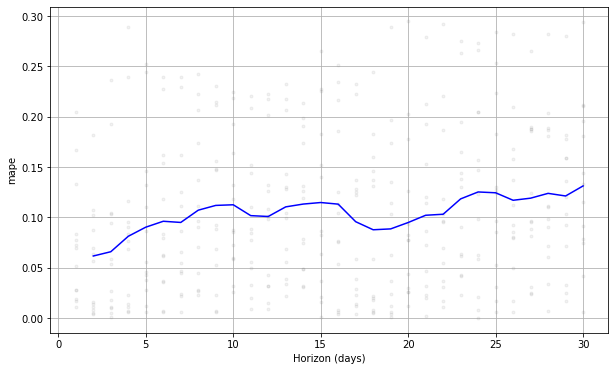

In [205]:
# Visualize the performance metrics

T_fc_cv_fig = plot_cross_validation_metric(Tuned_forecast_cv, 
                                           metric='mape', 
                                           rolling_window=0.05
                                           )
plt.show()


### Mean Absolute Percentage Error By Sklearn

In [173]:
# Data for the MAPE calculation 

df_y_yhat2 = pd.merge(BTC_2020_2022_Date_Price, T_forecast_model[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],on='ds')
df_y_yhat2.head()


# calculate MAPE between expected and predicted values
y_true = df_y_yhat2['y'].values
y_pred = df_y_yhat2['yhat'].values
mape_2 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_2)

MAPE: 0.073


# Results

## Before and After Hyperparameter Tuning Performance Metric Comparison

In [ ]:
'''' 
To make the custom plot showned below, the horizon column data format needs to be of the type integer.

There are 4 sets of dataframes

The problem is dealt in 2 different ways

''''


pm_all['horizon'] = pm_all['horizon'].astype('timedelta64[D]')
T_pm_all['horizon'] = T_pm_all['horizon'].astype('timedelta64[D]')

T_pm.insert(0, 'Horizon Number', range(2, 2 + len(T_pm)))
pm.insert(0, 'Horizon Number', range(2, 2 + len(T_pm)))

In [216]:


layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

figure6 = go.Figure(layout = layout)


# Model 1 - Folds
figure6.add_trace(go.Scatter(name = 'Model 1 Folds',
                            x=pm_all['horizon'], 
                            y=pm_all['mape'],
                            mode="markers",
                            line = {'width' : 4},
                            #marker = {'color' : '#19D3F3'}))
                            marker = {'color' : '#B8BFE6'}))

# Model 2 - Folds
figure6.add_trace(go.Scatter(name = 'Model 2 Folds',
                            x=T_pm_all['horizon'], 
                            y=T_pm_all['mape'],
                            mode="markers",
                            line = {'width' : 4},
                            marker = {'color' : '#F5D3E6'}))


# Model 1 - Aggregated
figure6.add_trace(go.Scatter(name = 'M1:Before Fine Tuning',
                            x=pm['Horizon Number'], 
                            y=pm['mape'],
                            mode="lines",
                            line = {'width' : 4},
                            #marker = {'color' : '#19D3F3'}))
                            marker = {'color' : '#3948A5'}))


# Model 2 - Aggregated
figure6.add_trace(go.Scatter(name = 'M2:After Fine Tuning',
                            x=T_pm['Horizon Number'], 
                            y=T_pm['mape'],
                            mode="lines",
                            line = {'width' : 4},
                            marker = {'color' : '#B826B1'}
                             ))




figure6.update_xaxes(title_text="Horizon (Day)", showgrid=True, gridwidth=1, gridcolor='lightgray')  
figure6.update_yaxes(title_text="MAPE", showgrid=True, gridwidth=1, gridcolor='lightgray')  

figure6.update_layout( 
                      legend= {'borderwidth' : 2,'bordercolor' : "lightgrey"}, 
                      title_text= "Before and After Hyperparameter Tuning Performance Metric Comparison", 
                      title_font_size=20,
                      width=900,
                      title_x=0.5)
#height=600

The chart above displays the cross validation results for Model 1: model before fine tuning (line in blue), and Model 2: model after fine tuning (line in purple). 

Each line represents the aggregated performance of 13 folds that the cross validation function calculated over the horizon of 30 days for each of the two Models. 

While the first model (model before fine tuning) already had some manually tweaked hyperparameters (meaning it used hyperparameters and values other than default ones), the second model was introduced to 2 new hyperparameters that the first model did not have.

Since prophet documentation suggested these two were the most impactful if tuned right, I left these parameters to be tuned by an automatic tuning script. The tuning script performed a 4x4 grid search trying out every possible combination of predetermined values in the grid.

In the figure above, we can clearly see a noticeable reduction in the mean absolute percentage error between model 1 and model 2. Model 1 MAPE values for the 30 day horizon ranged between 7.35% to 15.81%. While Model 2 MAPE values for the same horizon ranged between 6.16% to 13.11%

We can see that MAPE values increases as horizon days increases, which is expected because time series tend to make better predictions for the near future than far in the future.


In [53]:
metrics_prophet_01 = [round(mape_1,3)]

metrics_prophet_02 = [round(mape_2,3)]

pd.DataFrame({'metric':['MAPE'],
              'Model 1':metrics_prophet_01, 
              'Model 2':metrics_prophet_02,
             })


,metric,Model 1,Model 2
0,MAPE,0.08,0.073


To check how closely the model line of best fit represents the data, we calculated the mean absolute percentage error for the whole dataset, as we can see on the dataframe above. Model 2 is the most accurate with a MAPE of 0.073 or 7.3% compared to Model 1 that had a MAPE of 0.08 or 8.0%, resulting on a difference of 0.7%.

# Conclusion


While Prophet is presented as very user friendly product, ready to produce outstanding results with little tweaking, I find that there is a lot of room for customization that can improve your results in a meaningful way. But, to make the right tweaking of the parameters, one should understand their data well and its domain, and be knowledgeable about time series forecasting.

<br>
Moreover, as I mentioned before, I got the best results, measured by cross validation analysis, using relatively newer data (just over the last 2 years). My assumption is that the profile of the asset has change drastically in the last 2 years, due to an increase in institutional interest. So that older data, prior institutional involvement, renders less weight on future predictions.

<br>
It would be interesting to revisit and retrain the model in the upcoming years; as more data accrues, the asset keeps maturing, and a more prominent seasonality emerges.

<br>
<br>
Regarding future direction, I’ll be looking for a model that, unlike Prophet, would allow me to add regressors for which future values are unknow. Regressors that I’m particularly thinking about are the dollar index, the NASDAQ, gold prices, 10 or 20 years US Treasuries, and the yield curve.



